In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


import keras
from keras.layers import Dropout
from keras.utils import np_utils
import tensorflow as tf

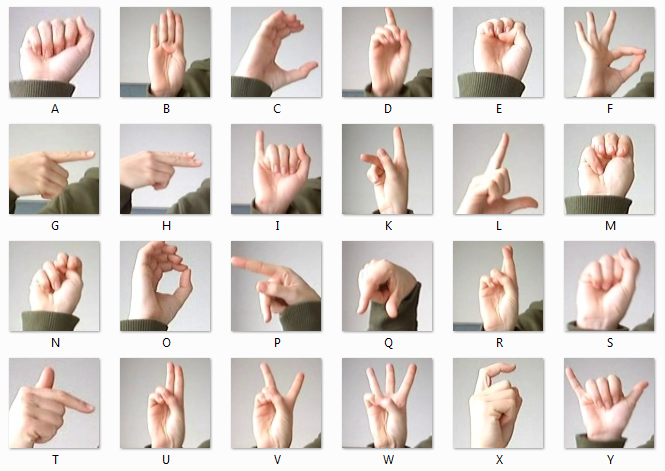

In [2]:
from IPython.display import Image
Image(filename="/Users/prasunamannava/Desktop/Metis/Neural_Networks/DeepLearning_Project/amer_sign2.png", width= 500, height=300)

## Importing Data

In [3]:
df_sign_train = pd.read_csv('sign_mnist_train.csv')

In [4]:
df_sign_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
df_sign_test = pd.read_csv('sign_mnist_test.csv')

## Setting up train and test sets

In [6]:
scaler = StandardScaler()

In [7]:
X_train = df_sign_train.iloc[:,1:785]

In [8]:
X_train_scaled= scaler.fit_transform(X_train)


In [9]:
X_train2 = X_train_scaled.reshape((-1,28,28,1))

In [10]:
X_test = df_sign_test.iloc[:,1:785]

In [11]:
X_test_scaled = scaler.transform(X_test)

In [12]:
X_test2 = X_test_scaled.reshape((-1,28,28,1))

In [13]:
y_train = df_sign_train['label']

In [14]:
y_test = df_sign_test['label']

In [15]:
y_train_cat = np_utils.to_categorical(y_train)

In [16]:
X_train2.shape,y_train_cat.shape

((27455, 28, 28, 1), (27455, 25))

## Convolutional Neural Net

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer, BatchNormalization

NN = Sequential()

NN.add(InputLayer(input_shape=X_train2.shape[1:]))

NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
NN.add(BatchNormalization())
NN.add(Dropout(.20))
NN.add(MaxPooling2D())


NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
NN.add(Dropout(.20))
NN.add(MaxPooling2D())

NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
NN.add(BatchNormalization())
NN.add(Dropout(.20))
NN.add(MaxPooling2D())

NN.add(Conv2D(filters=40, kernel_size=3, activation='relu', padding='same'))
NN.add(Dropout(.20))
NN.add(MaxPooling2D())


NN.add(Conv2D(filters=50, kernel_size=3, activation='relu', padding='same'))
NN.add(BatchNormalization())
NN.add(Dropout(.20))
NN.add(GlobalAveragePooling2D())
#NN.add(Flatten())



NN.add(Dense(100, activation='relu'))
NN.add(Dense(100, activation='relu'))
NN.add(Dropout(.20))
NN.add(Dense(25, activation='softmax'))  # 25 target classes

NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
NN.summary()
history = NN.fit(X_train2, y_train_cat, epochs=20, verbose=1, validation_split=0.25,
       callbacks=[
           keras.callbacks.EarlyStopping(patience=2, verbose=1, restore_best_weights=True),
           keras.callbacks.ReduceLROnPlateau(factor=.5, patience=2, verbose=1),
           #keras.callbacks.ModelCheckpoint(
               #'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               #save_best_only=True)
       ])  # track progress as we fit

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 10)        40        
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 20)        1820      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 20)          0

In [18]:
accuracy_score(y_test, NN.predict_classes(X_test2))

/usr/local/Cellar/jupyterlab/3.0.16_1/libexec/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9708588957055214

## Confusion Matrix

In [19]:
y_pred = np.argmax(NN.predict(X_test2),axis = 1) 


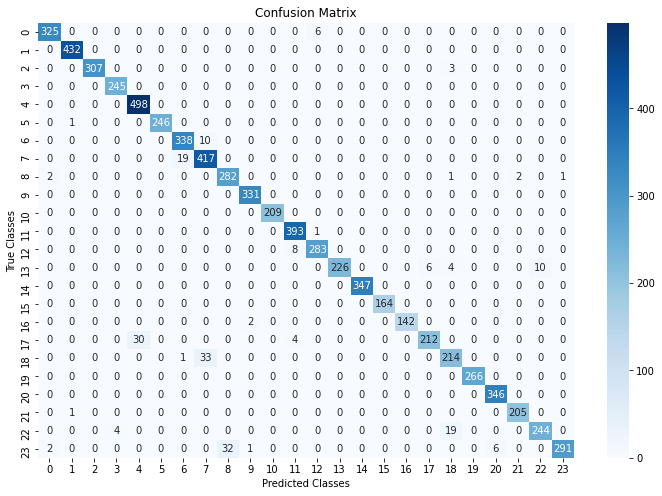

In [20]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,8))
sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()


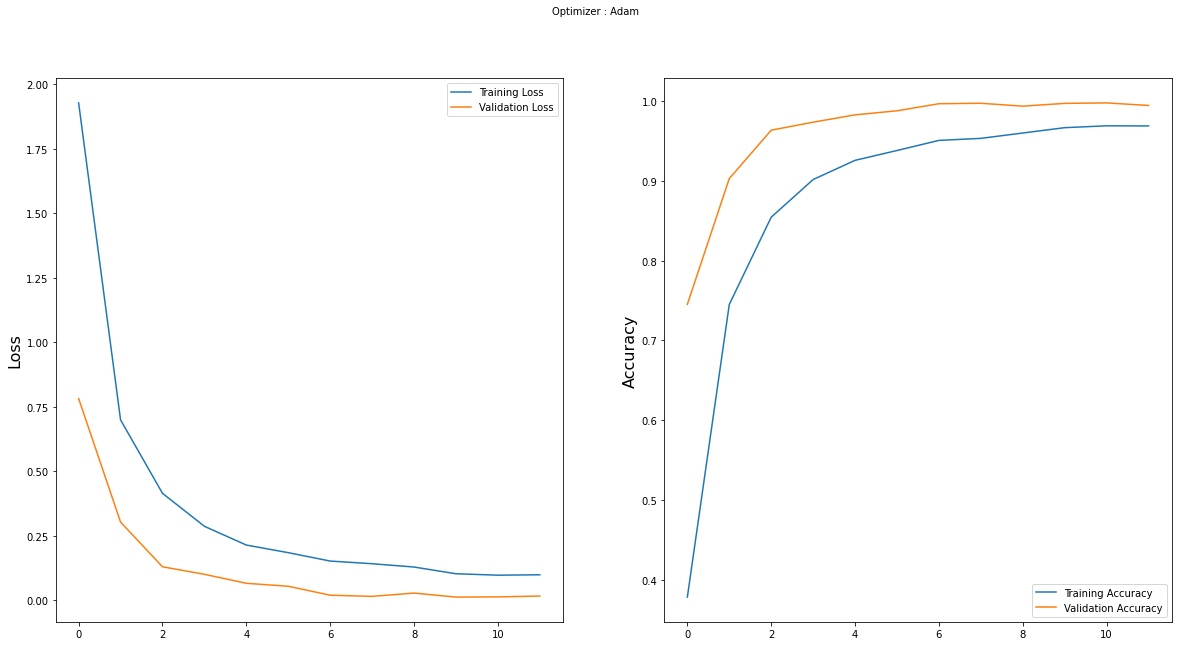

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Evaluating Predicted Images

In [22]:
df_sign_test['Predicted'] = y_pred.tolist()

In [23]:
df_sign_test.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Predicted
0,6,149,149,150,150,150,151,151,150,151,...,148,127,89,82,96,106,112,120,107,6
1,5,126,128,131,132,133,134,135,135,136,...,104,194,183,186,184,184,184,182,180,5


In [24]:
df_sign_incorrect = df_sign_test[(df_sign_test['label']!= df_sign_test['Predicted'])]

In [25]:
df_sign_incorrect.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Predicted
48,19,166,166,166,168,170,171,172,172,172,...,192,191,190,189,189,189,187,186,185,7
58,7,139,142,144,146,149,150,153,153,156,...,194,194,194,194,194,194,193,192,192,6


In [26]:
df_sign_incorrect.shape

(209, 786)

## Picking first row for each subclass

In [27]:
df_sign_incorrect_unique = df_sign_incorrect.groupby('label').first().reset_index()

In [28]:
df_sign_incorrect_unique.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Predicted
0,0,196,198,201,202,203,205,204,203,203,...,112,204,241,215,187,202,113,170,206,13
1,2,52,59,69,86,93,99,105,108,110,...,155,156,157,157,159,158,160,160,162,19


In [29]:
df_sign_incorrect_unique_1 = df_sign_incorrect_unique.rename(columns={"label": "Actual", "Predicted": "label"})

In [30]:
df_sign_incorrect_unique_1.head(2)

,Actual,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,196,198,201,202,203,205,204,203,203,...,112,204,241,215,187,202,113,170,206,13
1,2,52,59,69,86,93,99,105,108,110,...,155,156,157,157,159,158,160,160,162,19


## Adding pixel data for predicted label

In [31]:
%store -r df_sign_alpha

In [32]:
df_sign_incorrect_unique_2 = pd.merge(df_sign_incorrect_unique_1, df_sign_alpha, on="label")

In [33]:
df_sign_incorrect_unique_2.head(2)

,Actual,pixel1_x,pixel2_x,pixel3_x,pixel4_x,pixel5_x,pixel6_x,pixel7_x,pixel8_x,pixel9_x,...,pixel775_y,pixel776_y,pixel777_y,pixel778_y,pixel779_y,pixel780_y,pixel781_y,pixel782_y,pixel783_y,pixel784_y
0,0,196,198,201,202,203,205,204,203,203,...,92,105,105,108,133,163,157,163,164,179
1,12,228,231,231,232,233,234,236,236,236,...,92,105,105,108,133,163,157,163,164,179


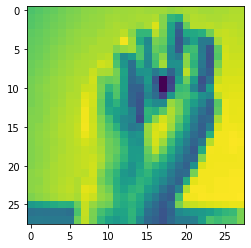

In [34]:
## Predicted image
plt.imshow(np.array(df_sign_incorrect_unique_2.iloc[1, 786:1570]).reshape(28,28));

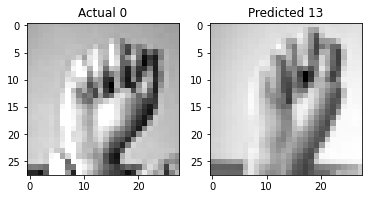

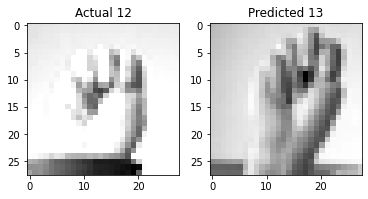

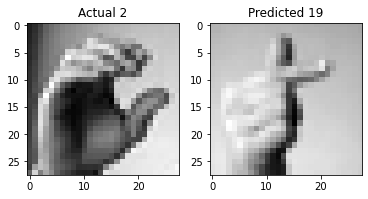

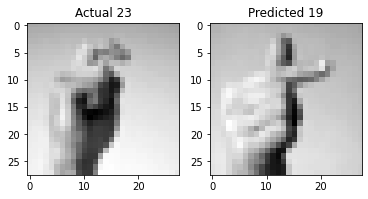

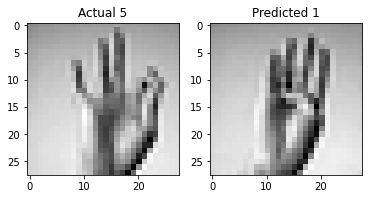

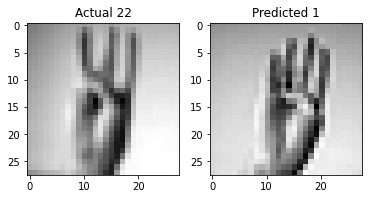

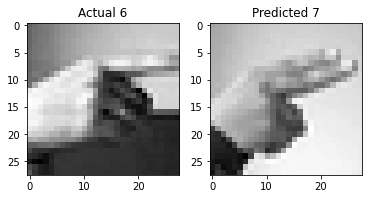

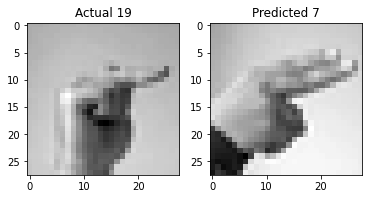

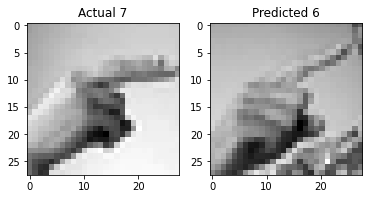

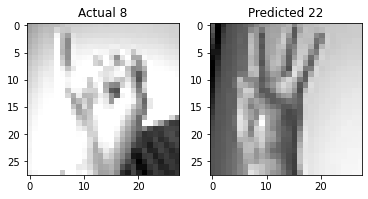

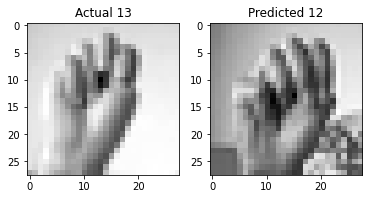

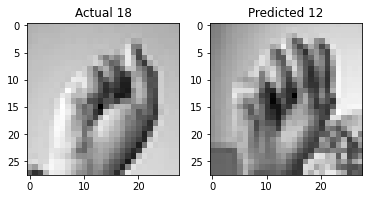

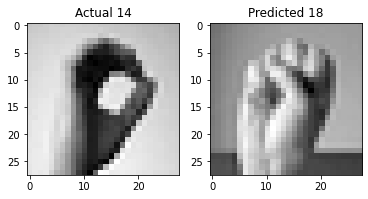

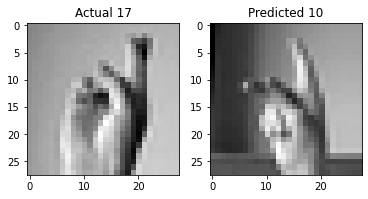

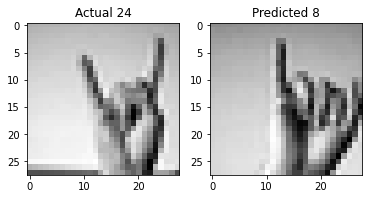

In [35]:
for i in range(15):
    image_actual = np.array(df_sign_incorrect_unique_2.iloc[i, 1:785]).reshape(28,28);
    image_predicted = np.array(df_sign_incorrect_unique_2.iloc[i, 786:1570]).reshape(28,28);


    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.imshow(image_actual, cmap = 'gray')
    plt.title(f"Actual {df_sign_incorrect_unique_2.Actual.iloc[i]}")


    plt.subplot(1, 2, 2) # index 2
    plt.imshow(image_predicted, cmap = 'gray')
    plt.title(f"Predicted {df_sign_incorrect_unique_2.label.iloc[i]}")


    plt.show()